**Daun Kim** (김다운, 2351094)<br>

# Predict Electricity Peak Consumption

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 0. Load Data

In [2]:
df = pd.read_csv('./data/data.csv', parse_dates=True,index_col=0)

In [3]:
index_column = pd.date_range(start ='2021-01-01 00:00', end ='2021-09-14 23:00', freq ='H')
df.index = index_column
df.index.names = ['Date']


In [4]:
df

,시간,15분,30분,45분,60분,평균,생산량,기온,풍속,습도,강수량,전기요금(계절),day,d,m,공장인원,인건비
Date,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,0,62,61,61,61,61,0,-3.2,2.4,71,0.0,109.8,5,1,1,0.000000,1.5
2021-01-01 01:00:00,1,96,93,116,113,105,0,-4.5,1.5,77,0.0,109.8,5,1,1,0.000000,1.5
2021-01-01 02:00:00,2,106,96,106,107,104,0,-3.9,2.6,58,0.0,109.8,5,1,1,0.000000,1.5
2021-01-01 03:00:00,3,92,110,110,109,105,0,-4.1,2.6,56,0.0,109.8,5,1,1,0.000000,1.5
2021-01-01 04:00:00,4,108,105,106,108,107,0,-4.6,2.6,60,0.0,109.8,5,1,1,0.000000,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-14 19:00:00,19,152,151,171,139,153,1497,21.7,3.6,85,9.4,167.2,2,14,9,2.442088,1.5
2021-09-14 20:00:00,20,124,130,128,130,128,45,22.2,4.2,78,9.4,167.2,2,14,9,0.087891,1.5
2021-09-14 21:00:00,21,134,130,125,124,128,149,22.2,4.3,76,9.4,167.2,2,14,9,0.290448,1.5


## 1. EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6168 entries, 2021-01-01 00:00:00 to 2021-09-14 23:00:00
Freq: H
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시간        6168 non-null   int64  
 1   15분       6168 non-null   int64  
 2   30분       6168 non-null   int64  
 3   45분       6168 non-null   int64  
 4   60분       6168 non-null   int64  
 5   평균        6168 non-null   int64  
 6   생산량       6168 non-null   int64  
 7   기온        6168 non-null   float64
 8   풍속        6165 non-null   float64
 9   습도        6168 non-null   int64  
 10  강수량       6167 non-null   float64
 11  전기요금(계절)  6168 non-null   float64
 12  day       6168 non-null   int64  
 13  d         6168 non-null   int64  
 14  m         6168 non-null   int64  
 15  공장인원      6151 non-null   float64
 16  인건비       6168 non-null   float64
dtypes: float64(6), int64(11)
memory usage: 867.4 KB


### 1.1 Feature correlation

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

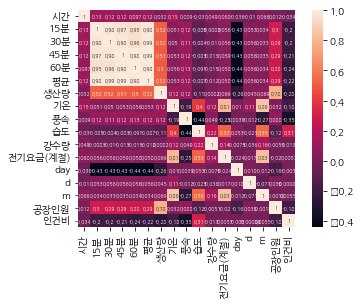

In [6]:
from matplotlib import font_manager, rc

font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

sns.heatmap(df.corr(), vmax =1, square =True, annot = True, annot_kws = {'size' : 5})

### 1.2 Handling missing values
df is altered to a DataFrame where missing values are replaced with 0

In [7]:
df.isnull().sum()

시간           0
15분          0
30분          0
45분          0
60분          0
평균           0
생산량          0
기온           0
풍속           3
습도           0
강수량          1
전기요금(계절)     0
day          0
d            0
m            0
공장인원        17
인건비          0
dtype: int64

In [8]:
df.fillna(0,inplace=True)
df.isnull().sum()

시간          0
15분         0
30분         0
45분         0
60분         0
평균          0
생산량         0
기온          0
풍속          0
습도          0
강수량         0
전기요금(계절)    0
day         0
d           0
m           0
공장인원        0
인건비         0
dtype: int64

### 1.3 Checking for Outlier

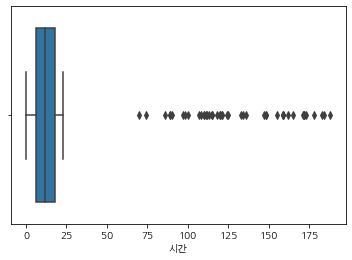

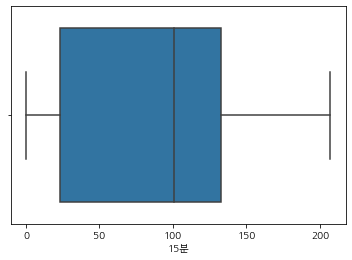

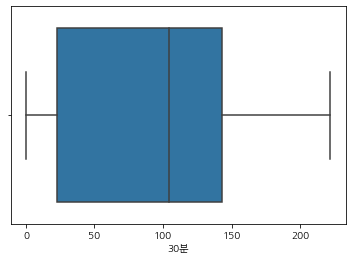

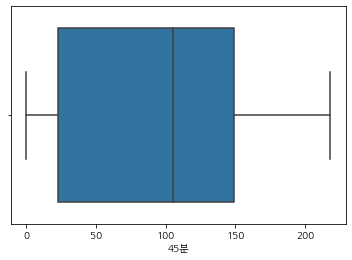

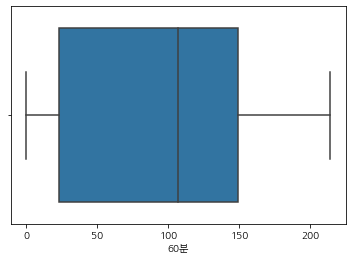

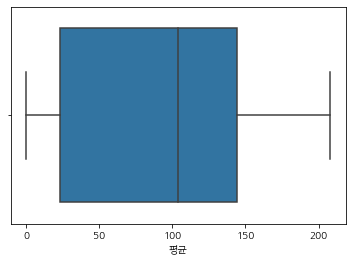

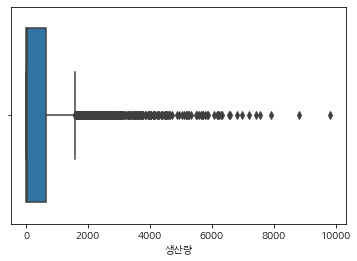

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


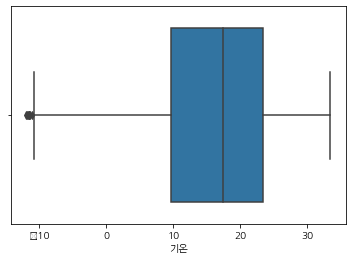

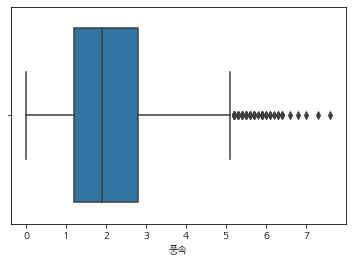

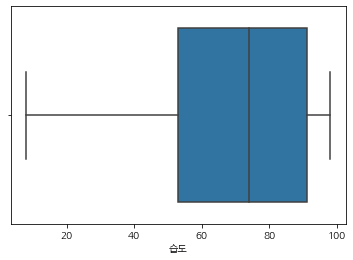

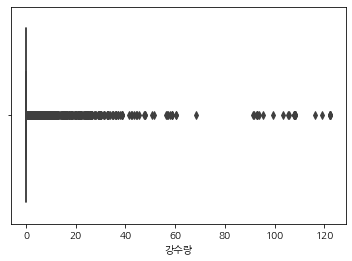

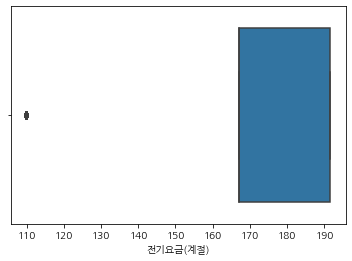

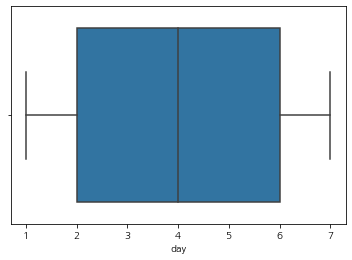

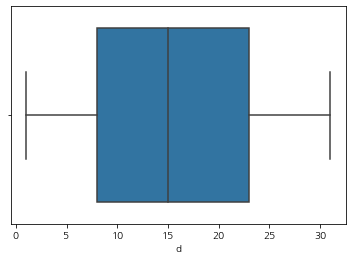

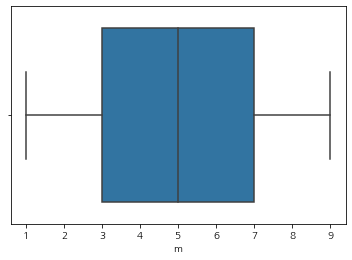

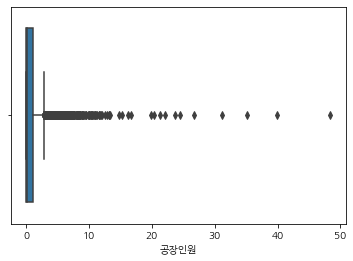

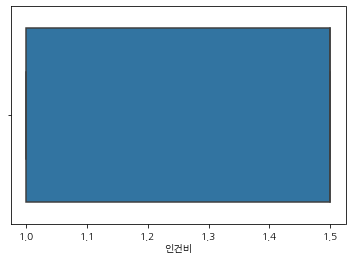

In [9]:
for col in df.columns:
    sns.boxplot(data=df, x=col)
    plt.show()

Find outliers based on IQR
Replace Outliers with average

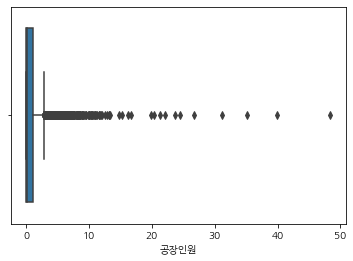

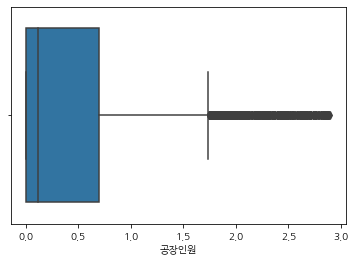

In [10]:
sns.boxplot(data=df, x='공장인원')
plt.show()

Q1 = df['공장인원'].quantile(0.25)
Q3 = df['공장인원'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Calculate mean excluding outliers
mean = df[(df['공장인원'] >= lower_bound) & (df['공장인원'] <= upper_bound)]['공장인원'].mean()

# Replace outliers with the mean
df['공장인원'] = df['공장인원'].apply(lambda x: mean if x < lower_bound or x > upper_bound else x)

sns.boxplot(data=df, x='공장인원')
plt.show()


Rebuild Hour values based on "hour of index"

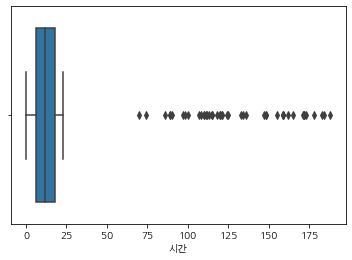

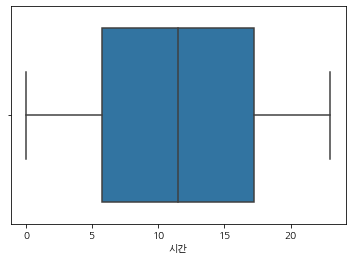

In [11]:
sns.boxplot(data=df, x='시간')
plt.show()

df['시간'] = df.index.hour 

sns.boxplot(data=df, x='시간')
plt.show()

### 1.4 Target variable 

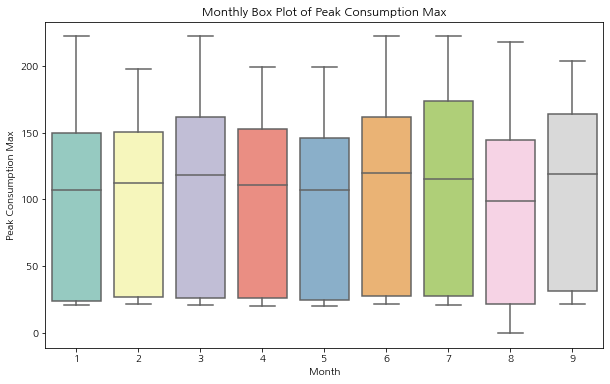

In [12]:
df['Peak Consumption Max'] = df.iloc[:, 1:5].max(axis=1)

df['Month'] = df.index.month

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Month', y='Peak Consumption Max', palette="Set3")
plt.title("Monthly Box Plot of Peak Consumption Max")
plt.xlabel("Month")
plt.ylabel("Peak Consumption Max")
plt.show()

<AxesSubplot:xlabel='시간', ylabel='Peak Consumption Max'>

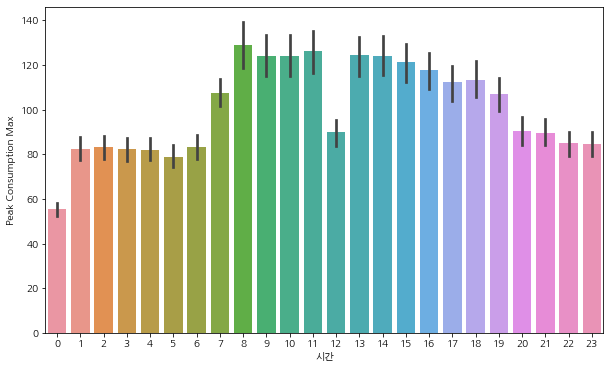

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='시간', y = 'Peak Consumption Max')

<AxesSubplot:xlabel='Peak Consumption Max', ylabel='Density'>

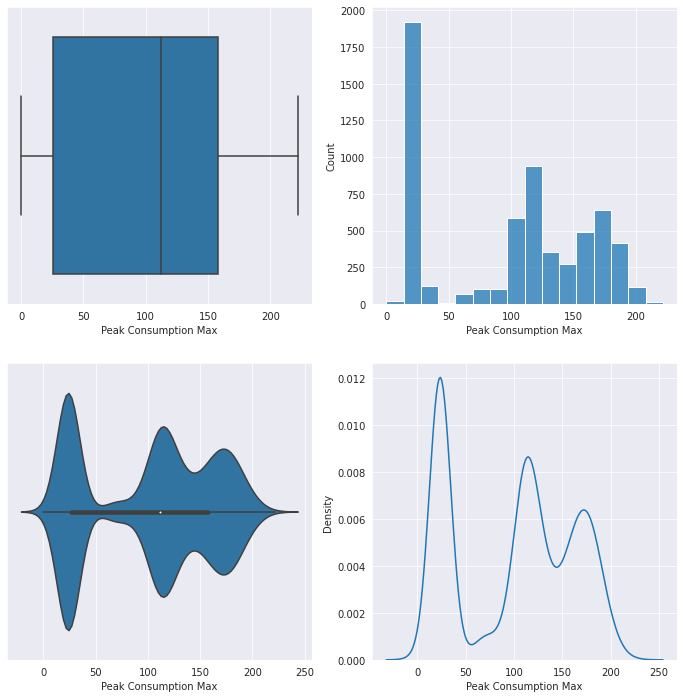

In [14]:
sns.set_style("darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(12, 12)) 

sns.boxplot(data=df,x='Peak Consumption Max',ax=axs[0,0])

sns.histplot(data=df,x='Peak Consumption Max',ax=axs[0,1])

sns.violinplot(data=df,x='Peak Consumption Max',ax=axs[1,0])

sns.kdeplot(data=df,x='Peak Consumption Max',ax=axs[1,1])


<AxesSubplot:xlabel='Date', ylabel='Peak Consumption Max'>

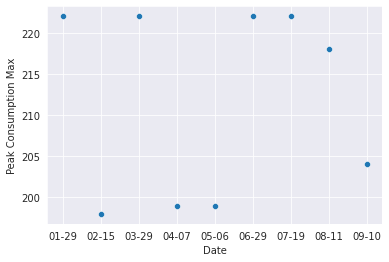

In [15]:
# select the ones with the maximum Peak Consumption Max value for each month
df_max = df.loc[df.groupby(df.index.month)["Peak Consumption Max"].idxmax()]
df_max.index = df_max.index.strftime('%m-%d')
df_max
sns.scatterplot(data=df_max, x='Date', y='Peak Consumption Max')

## 2. Feature Transformation

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

### 2.1 Numeric Features

In [17]:
# Numeric Variable Transformation
num_df = df[['기온','풍속','습도','강수량','공장인원','생산량']]
num_df.columns = ['temp','windspd','humd','rainfall','n_emp','prod']

In [18]:
mm_scaler = MinMaxScaler()
sd_scaler = StandardScaler()
bx_transformer = PowerTransformer('box-cox')

num_df['temp_trans'] = sd_scaler.fit_transform(num_df[['temp']])
num_df['windspd_trans'] = mm_scaler.fit_transform(num_df[['windspd']])
num_df['humd_trans'] = bx_transformer.fit_transform(num_df[['humd']])
num_df['prod_trans'] = mm_scaler.fit_transform(num_df[['prod']])
num_df['rainfall_trans'] = sd_scaler.fit_transform(num_df[['rainfall']])
num_df['n_emp_trans'] = sd_scaler.fit_transform(num_df[['n_emp']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [19]:
num_df

,temp,windspd,humd,rainfall,n_emp,prod,temp_trans,windspd_trans,humd_trans,prod_trans,rainfall_trans,n_emp_trans
Date,,,,,,,,,,,,
2021-01-01 00:00:00,-3.2,2.4,71,0.0,0.000000,0,-2.085903,0.315789,-0.050189,0.000000,-0.233447,-0.698031
2021-01-01 01:00:00,-4.5,1.5,77,0.0,0.000000,0,-2.227830,0.197368,0.232487,0.000000,-0.233447,-0.698031
2021-01-01 02:00:00,-3.9,2.6,58,0.0,0.000000,0,-2.162325,0.342105,-0.621327,0.000000,-0.233447,-0.698031
2021-01-01 03:00:00,-4.1,2.6,56,0.0,0.000000,0,-2.184160,0.342105,-0.703903,0.000000,-0.233447,-0.698031
2021-01-01 04:00:00,-4.6,2.6,60,0.0,0.000000,0,-2.238748,0.342105,-0.537299,0.000000,-0.233447,-0.698031
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-14 19:00:00,21.7,3.6,85,9.4,2.442088,1497,0.632553,0.473684,0.627005,0.152289,0.744500,2.793734
2021-09-14 20:00:00,22.2,4.2,78,9.4,0.087891,45,0.687140,0.552632,0.280717,0.004578,0.744500,-0.572362
2021-09-14 21:00:00,22.2,4.3,76,9.4,0.290448,149,0.687140,0.565789,0.184573,0.015158,0.744500,-0.282740


### 2.2 Categorical Features

In [20]:
# Categorical Variable
cat_df = df[['시간','day', 'm','전기요금(계절)']]
cat_df.columns = ['hour','day', 'month','unit_price']

In [21]:
bn = Binarizer(threshold = 5)
label_encoder = LabelEncoder()

cat_df['day_bin'] = bn.fit_transform(cat_df[['day']])
cat_df['hour_transformed'] = np.cos((cat_df['hour'] / 24) * 2 * np.pi)

cat_df['month_categ'] = pd.cut(cat_df['month'], bins=[0, 2, 5, 8, 9], labels=[0, 1, 2, 3]).astype(int) #0: winter 1:spring 2: summer 3:fall

one_hot_encoded_df = pd.get_dummies(cat_df, columns=['unit_price'])
one_hot_encoded_df['unit_price'] = cat_df['unit_price']
cat_df = one_hot_encoded_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [22]:
cat_df

,hour,day,month,day_bin,hour_transformed,month_categ,unit_price_109.8,unit_price_167.2,unit_price_191.6,unit_price
Date,,,,,,,,,,
2021-01-01 00:00:00,0,5,1,0,1.000000,0,1,0,0,109.8
2021-01-01 01:00:00,1,5,1,0,0.965926,0,1,0,0,109.8
2021-01-01 02:00:00,2,5,1,0,0.866025,0,1,0,0,109.8
2021-01-01 03:00:00,3,5,1,0,0.707107,0,1,0,0,109.8
2021-01-01 04:00:00,4,5,1,0,0.500000,0,1,0,0,109.8
...,...,...,...,...,...,...,...,...,...,...
2021-09-14 19:00:00,19,2,9,0,0.258819,3,0,1,0,167.2
2021-09-14 20:00:00,20,2,9,0,0.500000,3,0,1,0,167.2
2021-09-14 21:00:00,21,2,9,0,0.707107,3,0,1,0,167.2


### 2.3 Independent Variable

In [23]:
x1 = num_df[['temp_trans', 'windspd_trans', 'humd_trans', 'prod_trans','rainfall_trans','n_emp_trans']]
x2 = cat_df[['day_bin', 'hour_transformed', 'month_categ','unit_price']]
X = pd.concat([x1, x2], axis=1)

In [24]:
print(X.isna().sum())

temp_trans          0
windspd_trans       0
humd_trans          0
prod_trans          0
rainfall_trans      0
n_emp_trans         0
day_bin             0
hour_transformed    0
month_categ         0
unit_price          0
dtype: int64


In [25]:
X

,temp_trans,windspd_trans,humd_trans,prod_trans,rainfall_trans,n_emp_trans,day_bin,hour_transformed,month_categ,unit_price
Date,,,,,,,,,,
2021-01-01 00:00:00,-2.085903,0.315789,-0.050189,0.000000,-0.233447,-0.698031,0,1.000000,0,109.8
2021-01-01 01:00:00,-2.227830,0.197368,0.232487,0.000000,-0.233447,-0.698031,0,0.965926,0,109.8
2021-01-01 02:00:00,-2.162325,0.342105,-0.621327,0.000000,-0.233447,-0.698031,0,0.866025,0,109.8
2021-01-01 03:00:00,-2.184160,0.342105,-0.703903,0.000000,-0.233447,-0.698031,0,0.707107,0,109.8
2021-01-01 04:00:00,-2.238748,0.342105,-0.537299,0.000000,-0.233447,-0.698031,0,0.500000,0,109.8
...,...,...,...,...,...,...,...,...,...,...
2021-09-14 19:00:00,0.632553,0.473684,0.627005,0.152289,0.744500,2.793734,0,0.258819,3,167.2
2021-09-14 20:00:00,0.687140,0.552632,0.280717,0.004578,0.744500,-0.572362,0,0.500000,3,167.2
2021-09-14 21:00:00,0.687140,0.565789,0.184573,0.015158,0.744500,-0.282740,0,0.707107,3,167.2


### 2.4 Data transformation visualization

<AxesSubplot:ylabel='Count'>

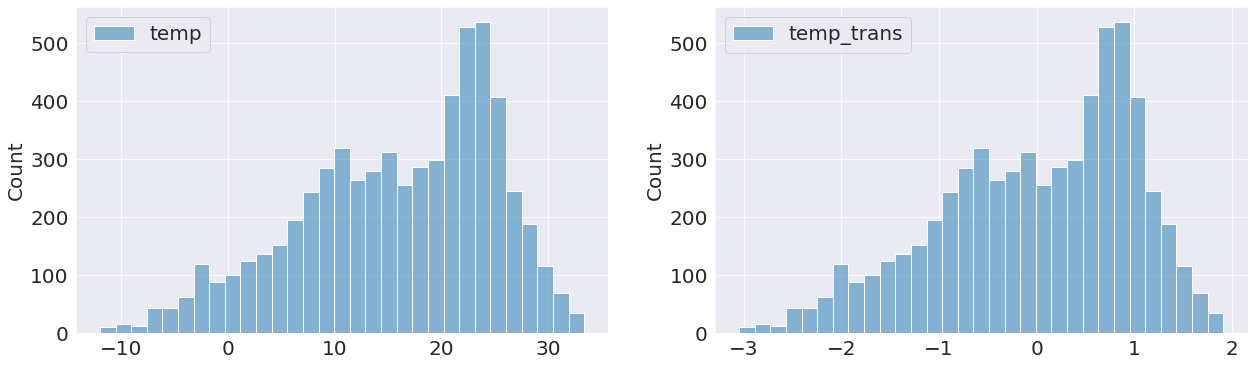

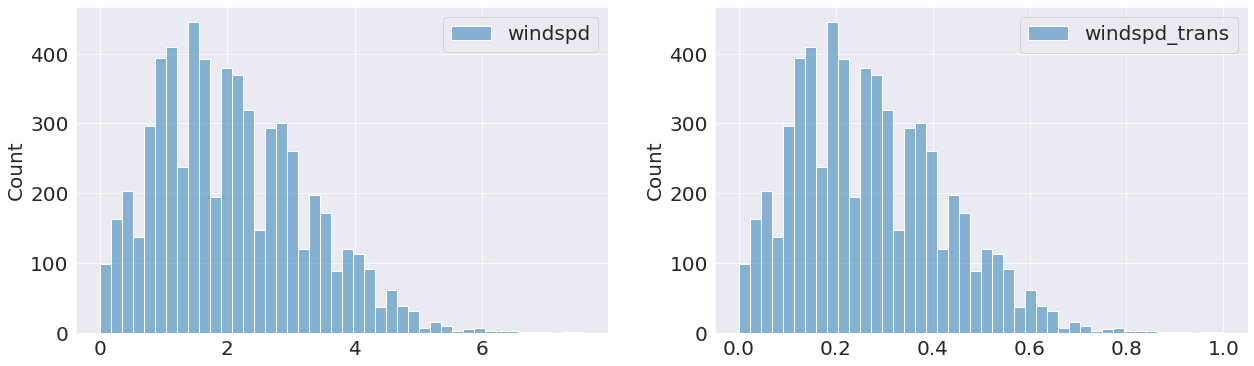

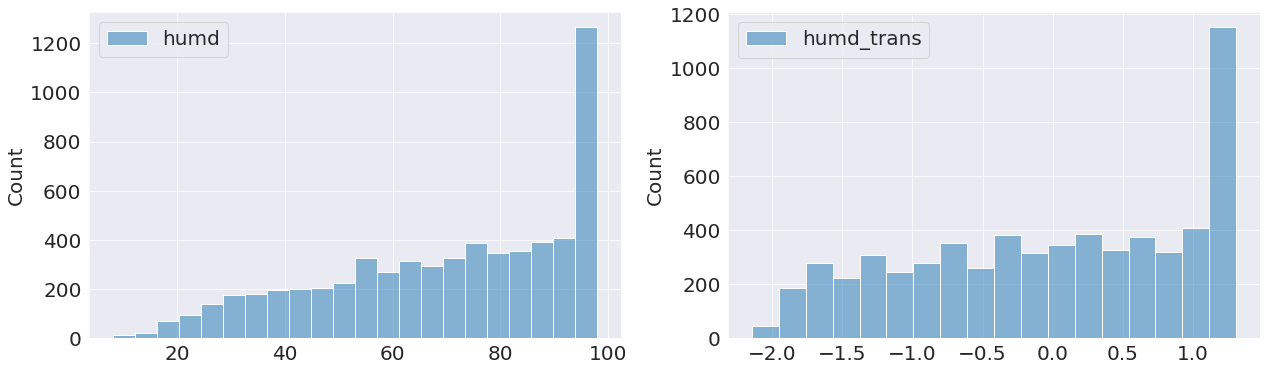

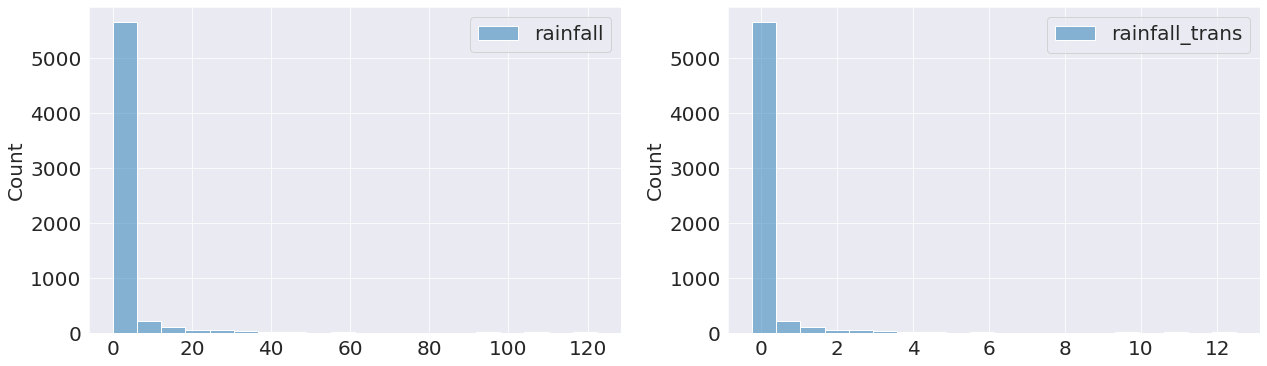

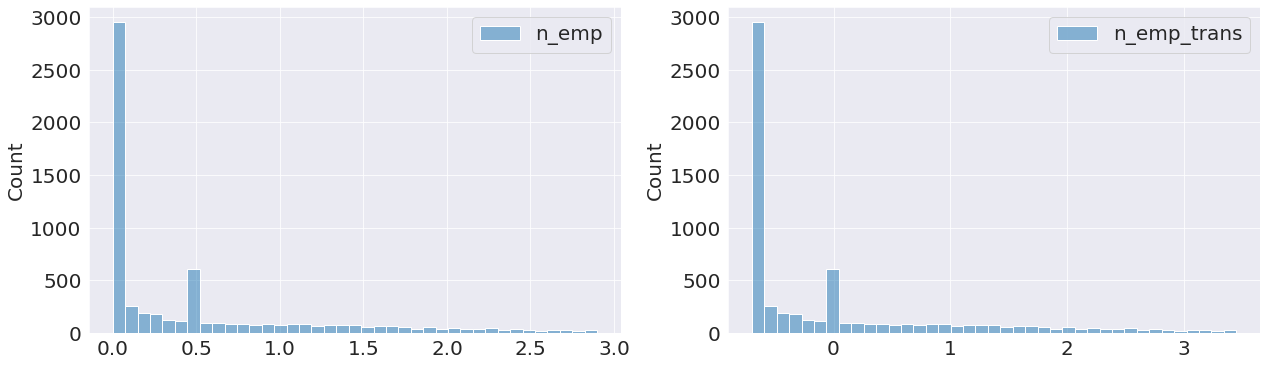

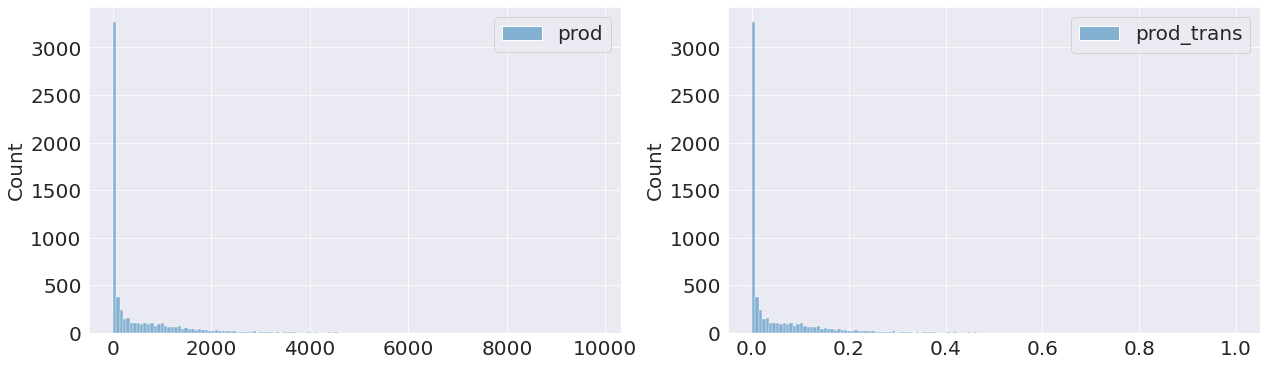

In [26]:
plt.rcParams['font.size'] = 20
fig, axes = plt.subplots(ncols=2, figsize=(21,6))
sns.histplot(data=num_df[['temp']], ax=axes[0])
sns.histplot(data=num_df[['temp_trans']], ax=axes[1])

fig, axes = plt.subplots(ncols=2, figsize=(21,6))
sns.histplot(data=num_df[['windspd']], ax=axes[0])
sns.histplot(data=num_df[['windspd_trans']], ax=axes[1])

fig, axes = plt.subplots(ncols=2, figsize=(21,6))
sns.histplot(data=num_df[['humd']], ax=axes[0])
sns.histplot(data=num_df[['humd_trans']], ax=axes[1])

fig, axes = plt.subplots(ncols=2, figsize=(21,6))
sns.histplot(data=num_df[['rainfall']], bins=20, ax=axes[0])  
sns.histplot(data=num_df[['rainfall_trans']], bins=20, ax=axes[1]) 

fig, axes = plt.subplots(ncols=2, figsize=(21,6))
sns.histplot(data=num_df[['n_emp']], ax=axes[0])
sns.histplot(data=num_df[['n_emp_trans']], ax=axes[1])

fig, axes = plt.subplots(ncols=2, figsize=(21,6))
sns.histplot(data=num_df[['prod']], ax=axes[0])
sns.histplot(data=num_df[['prod_trans']], ax=axes[1])

<AxesSubplot:xlabel='unit_price_191.6', ylabel='count'>

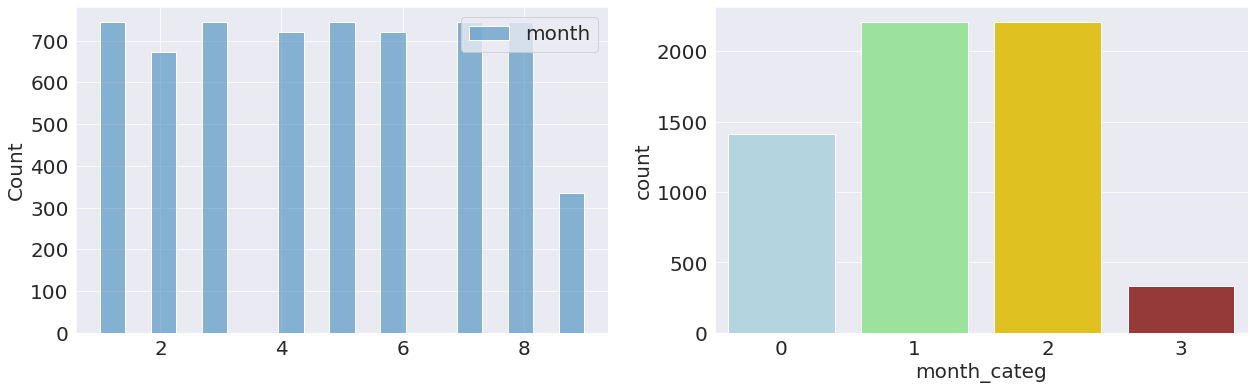

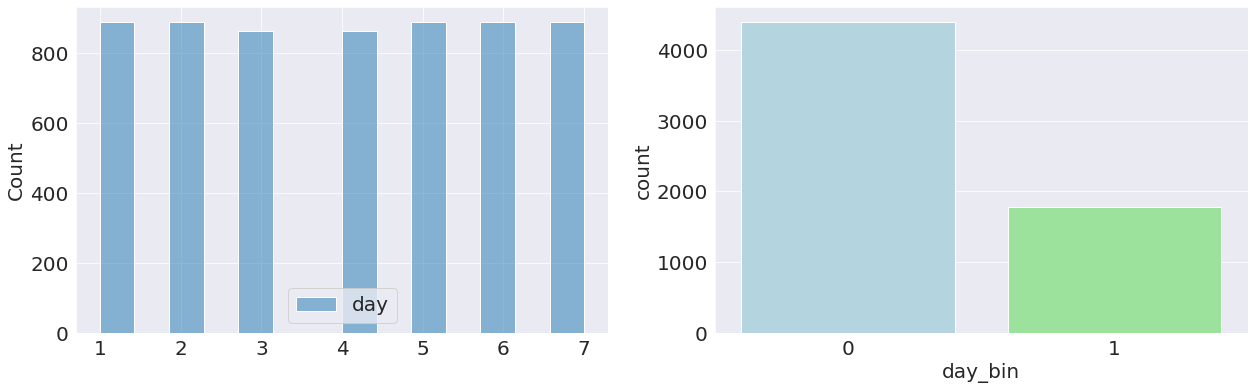

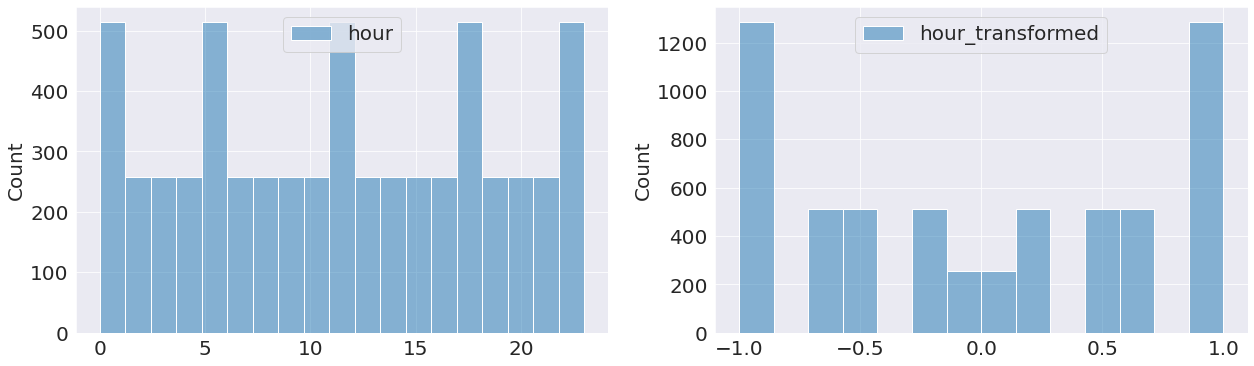

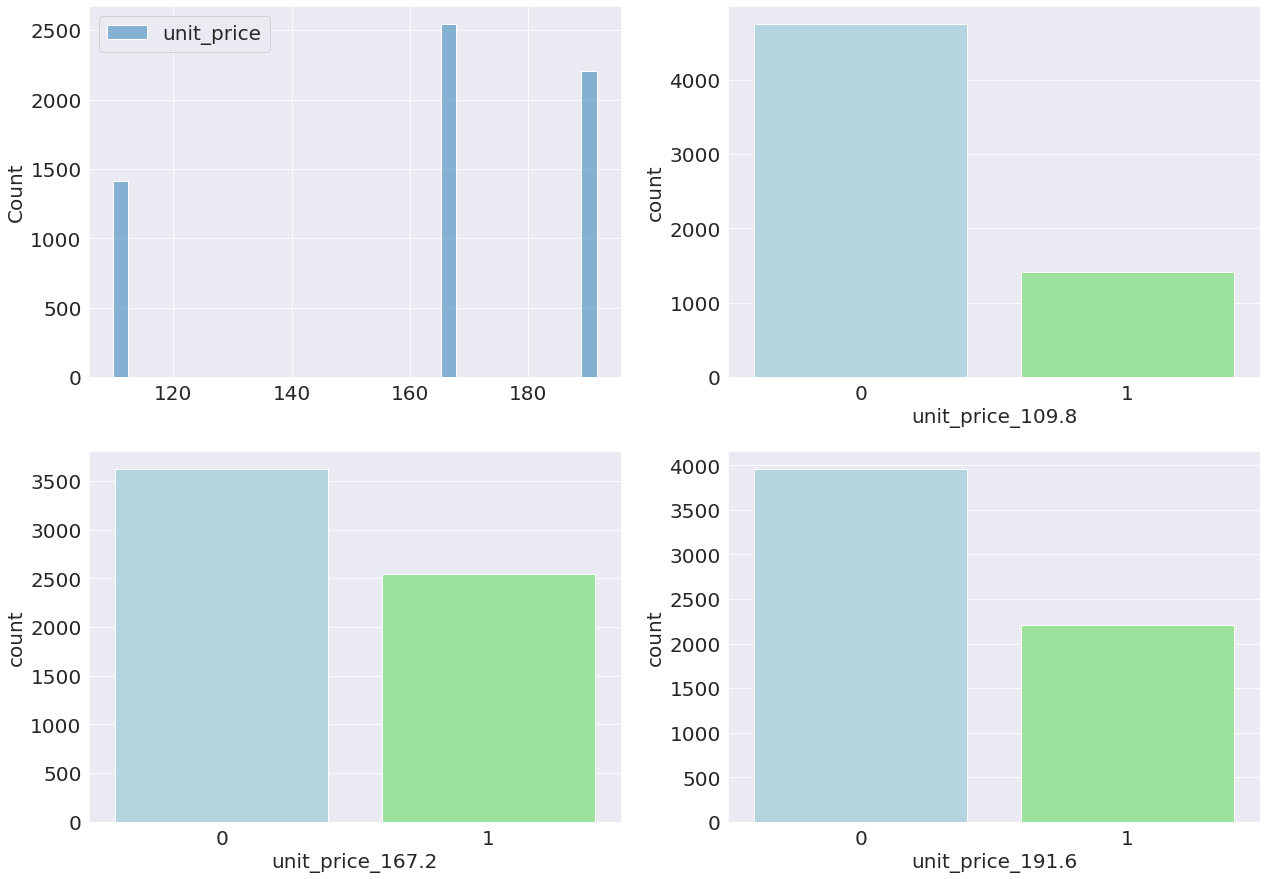

In [27]:
plt.rcParams['font.size'] = 20

season_palette = {0: 'lightblue', 1: 'lightgreen', 2: 'gold', 3: 'brown'}

fig, axes = plt.subplots(ncols=2, figsize=(21, 6))
sns.histplot(data=cat_df[['month']], ax=axes[0])
sns.countplot(x=cat_df['month_categ'], ax=axes[1], palette=season_palette)

fig, axes = plt.subplots(ncols=2, figsize=(21,6))
sns.histplot(data=cat_df[['day']], ax=axes[0])
sns.countplot(x=cat_df['day_bin'], ax=axes[1],palette=season_palette)

fig, axes = plt.subplots(ncols=2, figsize=(21,6))
sns.histplot(data=cat_df[['hour']], ax=axes[0])
sns.histplot(data=cat_df[['hour_transformed']], ax=axes[1])

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(21,15))
sns.histplot(data=cat_df[['unit_price']], ax=axes[0,0])
sns.countplot(x=cat_df['unit_price_109.8'], ax=axes[0,1],palette=season_palette)
sns.countplot(x=cat_df['unit_price_167.2'], ax=axes[1,0],palette=season_palette)
sns.countplot(x=cat_df['unit_price_191.6'], ax=axes[1,1],palette=season_palette)


### 2.5 Target Variable
 : Peak Electricity Consumption

In [28]:
y = df[['15분', '30분', '45분', '60분']].max(axis=1)

## 3. Linear Regression

In [29]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

### 3.1 Use MAPE 
(Mean Absolute Percentage Error)

In [30]:
# function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    # Avoid division by zero
    mask = y_true != 0
    y_true, y_pred = np.array(y_true)[mask], np.array(y_pred)[mask]

    # Calculate absolute percentage error
    ape = np.abs((y_true - y_pred) / y_true) * 100

    # Calculate mean absolute percentage error
    mape = np.mean(ape)

    return mape

### 3.2 Cross-Validation

In [31]:
# 5-fold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [32]:
lrmodel = LinearRegression()
y_pred = cross_val_predict(lrmodel, X, y, cv=kfold)

### 3.3 Metric

In [33]:
lr_mae_score = mean_absolute_error(y, y_pred)
lr_mse_score = mean_squared_error(y, y_pred)
lr_r2_scor = r2_score(y, y_pred)
lr_mape_score = mean_absolute_percentage_error(y, y_pred)

In [34]:
print("Cross-Validation Results")
print(f"MAE: %.2f" % (lr_mae_score.mean()))
print(f"MSE: %.2f" % (lr_mse_score.mean()))
print(f"R-squared: %.2f" % (lr_r2_scor.mean()))
print(f"MAPE: %.2f" % (lr_mape_score.mean()))

Cross-Validation Results
MAE: 33.97
MSE: 1823.02
R-squared: 0.52
MAPE: 73.70


In [35]:
from joblib import dump
lrmodel.fit(X, y)
dump(lrmodel, 'linear_regression_model.joblib')

['linear_regression_model.joblib']

## 4. Random Forest

In [36]:
from sklearn.ensemble import RandomForestRegressor

### 4.1 Cross-Validation

In [37]:
rfmodel = RandomForestRegressor(n_estimators=100, random_state=42)
y_pred = cross_val_predict(rfmodel, X, y, cv=kfold)

### 4.2 Metric

In [38]:
rf_mae_score = mean_absolute_error(y, y_pred)
rf_mse_score = mean_squared_error(y, y_pred)
rf_r2_scor = r2_score(y, y_pred)
rf_mape_score = mean_absolute_percentage_error(y, y_pred)

In [39]:
print("Cross-Validation Results")
print(f"MAE: %.2f" % (rf_mae_score.mean()))
print(f"MSE: %.2f" % (rf_mse_score.mean()))
print(f"R-squared: %.2f" % (rf_r2_scor.mean()))
print(f"MAPE: %.2f" % (rf_mape_score.mean()))

Cross-Validation Results
MAE: 16.85
MSE: 773.32
R-squared: 0.79
MAPE: 36.31


In [40]:
rfmodel.fit(X, y)
dump(rfmodel, 'random_forest_model.joblib')

['random_forest_model.joblib']

## 5. RNN

In [41]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

### 5.1 Create sequence data

In [42]:
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i+sequence_length]
        sequences.append(sequence)
    return np.array(sequences)

sequence_length = 10  # You can adjust this based on your problem
X_sequences = create_sequences(X, sequence_length)
y_sequences = y.values[sequence_length:]

### 5.2 Cross-Validation

In [43]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

In [45]:
y_true_all = []
y_pred_all = []

for train_index, test_index in tscv.split(X_sequences):
    X_train, X_test = X_sequences[train_index], X_sequences[test_index]
    y_train, y_test = y_sequences[train_index], y_sequences[test_index]

    model = Sequential()
    model.add(SimpleRNN(units=10, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_absolute_error')

    model.fit(X_train, y_train, epochs=200, batch_size=32)

    # Predict values for the test set
    y_test_pred = model.predict(X_test)

    # Append true and predicted values to the arrays for each fold
    y_pred_all.append(y_test_pred.flatten())
    y_true_all.append(y_test.flatten())

# Concatenate the true and predicted values for all folds
y_true_all = np.concatenate(y_true_all)
y_pred_all = np.concatenate(y_pred_all)

model.save('rnn_model.h5')

### 5.3 Metric

In [46]:
# Calculate evaluation metrics using all true and predicted values
rnn_mae_score = mean_absolute_error(y_true_all, y_pred_all)
rnn_mse_score = mean_squared_error(y_true_all, y_pred_all)
rnn_r2_score = r2_score(y_true_all, y_pred_all)
rnn_mape_score = mean_absolute_percentage_error(y_true_all, y_pred_all)

# Print the scores
print(f"MAE Score: {rnn_mae_score}")
print(f"MSE Score: {rnn_mse_score}")
print(f"R2 Score: {rnn_r2_score}")
print(f"MAPE Score: {rnn_mape_score}")

MAE Score: 31.71599298601727
MSE Score: 2046.223875683883
R2 Score: 0.45539443220353226
MAPE Score: 63.48070980732675


## 6. Results

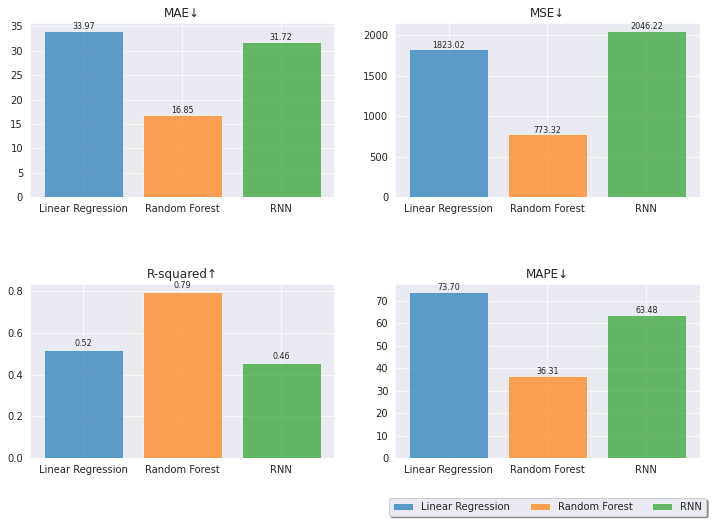

In [62]:

lr_metrics = {'MAE↓': lr_mae_score, 'MSE↓': lr_mse_score, 'R-squared↑': lr_r2_scor, 'MAPE↓': lr_mape_score}
rf_metrics = {'MAE↓': rf_mae_score, 'MSE↓': rf_mse_score, 'R-squared↑': rf_r2_scor, 'MAPE↓': rf_mape_score}
rnn_metrics = {'MAE↓': rnn_mae_score, 'MSE↓': rnn_mse_score, 'R-squared↑': rnn_r2_score, 'MAPE↓': rnn_mape_score}


metrics = list(lr_metrics.keys())
num_metrics = len(metrics)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5)

models = ['Linear Regression', 'Random Forest', 'RNN']
plt.rcParams['font.size'] = 10

for i, metric in enumerate(metrics):
    ax = axes[i // 2, i % 2]
    
    for j, model in enumerate(models):
        model_metrics = {'Linear Regression': lr_metrics, 'Random Forest': rf_metrics, 'RNN': rnn_metrics}[model]
        bar = ax.bar(j, model_metrics[metric], label=model, alpha=0.7)
        
        for rect in bar:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2, height + 0.01, f'{height:.2f}', ha='center', va='bottom', fontsize=8)

    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(models, fontsize=10)
    ax.set_title(metric)

plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', fancybox=True, shadow=True, ncol=len(models))

plt.show()


- The Random Forest regressor outperforms the Linear regression model and RNN across all metrics, providing more accurate predictions.
- The low R-squared for the RNN model (0.46) indicates a poor fit, suggesting that this model may not capture the underlying patterns or relationships in the data as effectively as the other models.
- The Random Forest's higher R-squared value (0.79) indicates that this model explains a large proportion of the variance in the dependent variable, suggesting a good fit to the data

- In summary, the **Random Forest** regressor appears to be a more effective model for the given task base on the above four metrics.

In [48]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
feature_importances = []

for train_idx, test_idx in kfold.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    model.fit(X_train, y_train)

    feature_importances.append(model.feature_importances_)

average_importances = np.mean(feature_importances, axis=0)

In [49]:
average_importances

array([0.0889697 , 0.05210457, 0.0647862 , 0.34105331, 0.02673858,
       0.23808611, 0.02339131, 0.14989973, 0.00890427, 0.00606621])

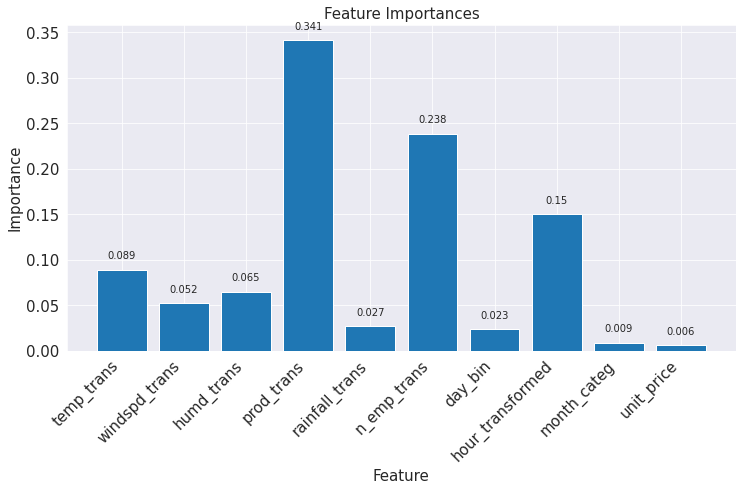

In [59]:
plt.rcParams['font.size'] = 15

fig, ax = plt.subplots(figsize=(12, 6))
bars = plt.bar(X.columns, average_importances)

plt.title('Feature Importances', fontsize=15)
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Importance', fontsize=15)
plt.xticks(rotation=45, ha='right')

for bar, importance in zip(bars, average_importances):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(importance, 3), ha='center', va='bottom', fontsize=10)

plt.show()


- *prod_trans* has the highest importance with a value of 0.341. This indicates that chages in production have the most significant impact on predicting the peak consumption. 
- The second most important feature, *n_emp_trans*, with an importance value of 0.238, it still has a considerable impact.This implies that the time of day also contributes significantly to predicting the consumption.
- The other features (month, humidity, day, wind-speed, temerature) have lower importance values, indicating that they have less influence.

- In summary, the model suggests that the transformed **production amount** (*prod_trans*) and the **number of employes**(*n_emp_trans*) are the most crucial factors for predicting the peak power consumption. Understanding and monitoring these factors could be essential for managing and optimizing the power usage.